# Example of how to load the saved data

In [6]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import pickle
from Utils.graphing_helpers import (edges_from_centers_log, edges_from_centers_linear)

In [3]:
def get_simulation_folderpath(exp_dir: str, J: float, Dr: float) -> str:
    """
    Returns the path for simulation folder path based on this project's convention.
    """
    simulation_folderpath = os.path.join(exp_dir, f'J={J:.4f}_and_Dr={Dr:.4f}')
    return simulation_folderpath

In [71]:
exp_dir = "saved_data/Polar_Align_Box_L=200_July_8"
J_index = 5 #largest value
Dr_index = 0 #smallest value
J = np.logspace(-3, 0, num=13)[J_index]
Dr = np.logspace(-3, 0, num=13)[:-2][Dr_index]
simulation_folderpath = get_simulation_folderpath(exp_dir, J, Dr)

final_time = 2.5e5
num_snapshots = 1000
times = np.linspace(0, final_time, num_snapshots)

One key in loaded dictionary: dict_keys(['director_vicsek_parameter'])
Director vicsek param value for 1000 time snapshots


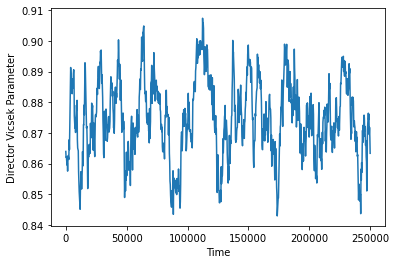

In [72]:
# Director Vicsek Parameter
with open(os.path.join(simulation_folderpath, 'director_vicsek_parameter.pickle'), 'rb') as file:
    director_vicsek_param = pickle.load(file)

print(f'One key in loaded dictionary: {director_vicsek_param.keys()}')
print(f"Director vicsek param value for {len(director_vicsek_param['director_vicsek_parameter'])} time snapshots")

plt.plot(times, director_vicsek_param['director_vicsek_parameter'])
plt.ylabel('Director Vicsek Parameter')
plt.xlabel('Time')
plt.show()

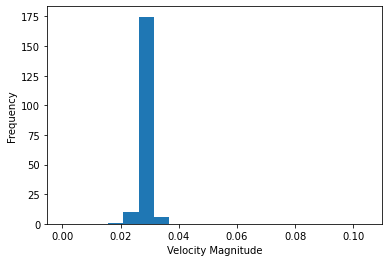

In [73]:
# Velocity magnitude histogram
with open(os.path.join(simulation_folderpath, 'velocity_magnitude_histogram.pickle'), 'rb') as file:
    velocity_magnitude_histogram = pickle.load(file)

velocity_magnitude_values = velocity_magnitude_histogram['velocity_magnitude_histogram']
velocity_magnitude_bins = velocity_magnitude_histogram['bin_edges']

# Saved data with numpy.histogram(), plotting data with matplotlib.pyplot.bar()
bar_width = velocity_magnitude_bins[1]-velocity_magnitude_bins[0]
plt.bar(velocity_magnitude_bins[:-1], velocity_magnitude_values, width=bar_width, align='edge')
plt.xlabel('Velocity Magnitude')
plt.ylabel('Frequency')
plt.show()

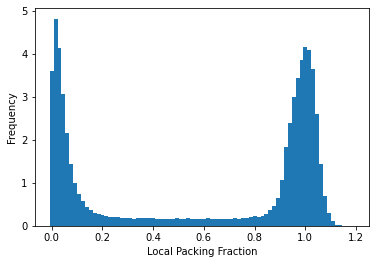

In [74]:
# Local Density Histogram
with open(os.path.join(simulation_folderpath, 'packing_fraction_histogram.pickle'), 'rb') as file:
    packing_fraction_histogram = pickle.load(file)

packing_fraction_values = packing_fraction_histogram['packing_fraction_histogram']
packing_fraction_bins = packing_fraction_histogram['bin_edges']

bar_width = packing_fraction_bins[1]-packing_fraction_bins[0]
plt.bar(packing_fraction_bins[:-1], packing_fraction_values, width=bar_width, align='edge')
plt.xlabel('Local Packing Fraction')
plt.ylabel('Frequency')
plt.show()

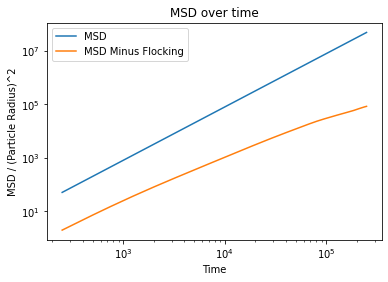

In [80]:
# Plot MSD over time
with open(os.path.join(simulation_folderpath, 'msd.pickle'), 'rb') as file:
    msd_data = pickle.load(file)

msd_normal = msd_data['msd_normal']
msd_minus_flocking = msd_data['msd_minus_flocking']

plt.plot(times[1:], msd_normal, label='MSD') #Doesn't compute MSD at initial time since equals zero by definition
plt.plot(times[1:], msd_minus_flocking, label='MSD Minus Flocking')
plt.title('MSD over time')
plt.ylabel('MSD / (Particle Radius)^2')
plt.xlabel('Time')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()